In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
perf=pd.read_excel('exam_performance.xlsx')
#Data cleaning part:

In [30]:
perf.head() # Examination of dataset.

,gender,race,class,studying_hour,monthly_income,school_ranking,anxiety_level,math_score,reading_score,writing_score
0,female,group1,class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,male,group1,NaN,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,female,group1,class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,male,group1,class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,female,group1,class1,NaN,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


In [31]:
perf.tail() # Examination of dataset.

,gender,race,class,studying_hour,monthly_income,school_ranking,anxiety_level,math_score,reading_score,writing_score
195,female,group3,class4,4.0,11172.893812,Low Level,-0.513441,25.953372,17.527060,16.388111
196,female,group3,class4,9.0,7438.077155,Top Level,-1.801260,34.968144,NaN,NaN
197,female,group3,class4,11.0,12382.600169,Low Level,-2.274089,26.950892,18.037510,21.576306
198,female,group3,class4,11.0,8486.852603,Middle Level,-2.754368,36.836072,17.652504,21.630075
199,NaN,group3,class4,5.0,9906.251713,NaN,-0.711730,27.067902,39.190756,13.653809


In [32]:
perf.isnull().sum() # Detection of null values.
perf.columns = perf.columns.str.title() # Capitalization of column names.
perf.columns = perf.columns.str.replace('_', ' ') # Underscores are replaced with space.
perf.info() # To observe dataset.
perf.head() # To check whether column names are fixed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          178 non-null    object 
 1   Race            186 non-null    object 
 2   Class           175 non-null    object 
 3   Studying Hour   179 non-null    float64
 4   Monthly Income  183 non-null    float64
 5   School Ranking  182 non-null    object 
 6   Anxiety Level   181 non-null    float64
 7   Math Score      184 non-null    float64
 8   Reading Score   177 non-null    float64
 9   Writing Score   178 non-null    float64
dtypes: float64(6), object(4)
memory usage: 15.8+ KB


,Gender,Race,Class,Studying Hour,Monthly Income,School Ranking,Anxiety Level,Math Score,Reading Score,Writing Score
0,female,group1,class1,9.0,7274.388964,Top Level,-1.885454,33.911273,25.704466,21.397077
1,male,group1,NaN,13.0,9069.311737,Middle Level,-3.099724,30.805942,24.531330,19.395260
2,female,group1,class1,11.0,8520.821204,Top Level,-2.654007,34.330911,28.911692,19.641871
3,male,group1,class1,9.0,9329.650475,Middle Level,-2.397245,24.319956,25.257689,19.584474
4,female,group1,class1,NaN,9243.939276,Middle Level,-1.712281,30.787309,19.759846,NaN


In [33]:
perf.duplicated().sum() # To detect duplicated rows.

0

In [34]:
perf['Gender'] # To examine gender column.

0      female
1        male
2      female
3        male
4      female
        ...  
195    female
196    female
197    female
198    female
199       NaN
Name: Gender, Length: 200, dtype: object

In [35]:
perf['Gender'].str.title() #Converts first character of each word to uppercase and remaining to lowercase.

0      Female
1        Male
2      Female
3        Male
4      Female
        ...  
195    Female
196    Female
197    Female
198    Female
199       NaN
Name: Gender, Length: 200, dtype: object

In [36]:
for i in perf.select_dtypes(include = 'object').columns:
  print(perf[i].value_counts())   # To detect untidy strings.

female    100
male       63
feMAle      9
MAle        6
Name: Gender, dtype: int64
group1    123
group2     33
group3     23
GROUP1      5
GROUP2      2
Name: Race, dtype: int64
class1    83
class2    44
class3    29
class4    19
Name: Class, dtype: int64
Middle Level    99
Top Level       43
Low Level       33
Middle leVel     3
Top leVel        2
Low leVel        2
Name: School Ranking, dtype: int64


In [37]:
perf['Gender'] = perf['Gender'].str.title() 
print(perf['Gender'].value_counts())       # Data items are fixed.

Female    109
Male       69
Name: Gender, dtype: int64


In [38]:
print(perf['Race'].value_counts())
perf['Race'] = perf['Race'].str.title()   # Data items are fixed.
print(perf['Race'].value_counts())

group1    123
group2     33
group3     23
GROUP1      5
GROUP2      2
Name: Race, dtype: int64
Group1    128
Group2     35
Group3     23
Name: Race, dtype: int64


In [39]:
print(perf['Class'].value_counts())         
perf['Class'] = perf['Class'].str.title()   # Data items are fixed.
print(perf['Class'].value_counts())

class1    83
class2    44
class3    29
class4    19
Name: Class, dtype: int64
Class1    83
Class2    44
Class3    29
Class4    19
Name: Class, dtype: int64


In [40]:
print(perf['Studying Hour'].value_counts()) # To observe studying hour column.
perf['Studying Hour'] = perf['Studying Hour'].replace(58465465.0, 7.7)
perf['Studying Hour'] = perf['Studying Hour'].replace(58465465, 7.7) # We calculated the mean of studying hour and change outliers with it.
print(perf['Studying Hour'].value_counts()) 
perf['Studying Hour'].mean()  #To check whether it is fixed

7.0           30
5.0           28
6.0           23
9.0           22
8.0           18
11.0          13
4.0            8
12.0           8
10.0           7
58465465.0     6
14.0           5
13.0           4
15.0           3
3.0            2
1.0            1
2.0            1
Name: Studying Hour, dtype: int64
7.0     30
5.0     28
6.0     23
9.0     22
8.0     18
11.0    13
4.0      8
12.0     8
10.0     7
7.7      6
14.0     5
13.0     4
15.0     3
3.0      2
1.0      1
2.0      1
Name: Studying Hour, dtype: int64


7.783240223463688

In [41]:
print(perf['Monthly Income'].value_counts())
perf['Monthly Income'] = perf['Monthly Income'].replace(58465465.0,9771.793273)
perf['Monthly Income'] = perf['Monthly Income'].replace(58465465,9771.793273) # We calculated the mean of monthly income and change outliers with it.

5.846546e+07    6
7.274389e+03    1
1.393285e+04    1
1.214186e+04    1
9.846540e+03    1
               ..
1.241890e+04    1
1.169537e+04    1
1.561756e+04    1
7.765451e+03    1
9.906252e+03    1
Name: Monthly Income, Length: 178, dtype: int64


In [42]:
print(perf['School Ranking'].value_counts())
perf['School Ranking'] = perf['School Ranking'].str.title() # Different value names are fixed.
print(perf['School Ranking'].value_counts())

Middle Level    99
Top Level       43
Low Level       33
Middle leVel     3
Top leVel        2
Low leVel        2
Name: School Ranking, dtype: int64
Middle Level    102
Top Level        45
Low Level        35
Name: School Ranking, dtype: int64


In [43]:
print(perf['Anxiety Level'].value_counts())
perf['Anxiety Level'] = perf['Anxiety Level'].replace(58465465,-1.527301)
perf['Anxiety Level'] = perf['Anxiety Level'].replace(58465465.0,-1.527301) #We calculated the mean of anxiety level and change outliers with it.
perf['Anxiety Level'] = perf['Anxiety Level'].abs() #Absolute values ​​of the entire column were taken because the anxiety level could not take negative values.
print(perf['Anxiety Level'].value_counts()) #To check whether it is fixed.

 5.846546e+07    6
-1.885454e+00    1
-1.574647e+00    1
-1.430173e+00    1
-2.350862e-01    1
                ..
-8.682193e-01    1
-1.839898e+00    1
-1.925229e+00    1
-1.036450e-01    1
-7.117302e-01    1
Name: Anxiety Level, Length: 176, dtype: int64
1.527301    6
1.885454    1
1.574647    1
1.430173    1
0.235086    1
           ..
0.868219    1
1.839898    1
1.925229    1
0.103645    1
0.711730    1
Name: Anxiety Level, Length: 176, dtype: int64


In [44]:
print(perf['Math Score'].value_counts())
perf['Math Score'] = perf['Math Score'].replace(58465465.0,31.352521)
perf['Math Score'] = perf['Math Score'].replace(58465465,31.352521) #We calculated the mean of math score and change outliers with it.

5.846546e+07    6
3.391127e+01    1
3.815739e+01    1
2.889209e+01    1
3.077591e+01    1
               ..
3.114790e+01    1
3.370211e+01    1
3.093331e+01    1
3.246663e+01    1
2.706790e+01    1
Name: Math Score, Length: 179, dtype: int64


In [45]:
print(perf['Reading Score'].value_counts())
perf['Reading Score'] = perf['Reading Score'].replace(58465465.0,25.173523)
perf['Reading Score'] = perf['Reading Score'].replace(58465465,25.173523) #We calculated the mean of reading score and change outliers with it.
print(perf['Reading Score'].value_counts())
print(np.mean(perf['Reading Score']))  #To check whether outliers are no longer exist.

5.846546e+07    6
2.570447e+01    1
1.990487e+01    1
2.301115e+01    1
1.768136e+01    1
               ..
1.284370e+01    1
3.059287e+01    1
1.584823e+01    1
2.313192e+01    1
3.919076e+01    1
Name: Reading Score, Length: 172, dtype: int64
25.173523    6
25.704466    1
19.904873    1
23.011155    1
17.681358    1
            ..
12.843704    1
30.592873    1
15.848230    1
23.131918    1
39.190756    1
Name: Reading Score, Length: 172, dtype: int64
25.25306117993701


In [46]:
print(perf['Writing Score'].value_counts())
perf['Writing Score'] = perf['Writing Score'].replace(58465465.0,18.994348)
perf['Writing Score'] = perf['Writing Score'].replace(58465465,18.994348) #We calculated the mean of writing score and change outliers with it.
print(perf['Writing Score'].value_counts()) #To check whether it is fixed.

5.846546e+07    6
2.139708e+01    1
1.973513e+01    1
2.057785e+01    1
2.224853e+01    1
               ..
2.117881e+01    1
2.076079e+01    1
1.649881e+01    1
1.873738e+01    1
1.365381e+01    1
Name: Writing Score, Length: 173, dtype: int64
18.994348    6
21.397077    1
19.735133    1
20.577847    1
22.248528    1
            ..
21.178806    1
20.760791    1
16.498814    1
18.737376    1
13.653809    1
Name: Writing Score, Length: 173, dtype: int64


In [47]:
perf.describe().transpose() # Examination of clean dataset.

,count,mean,std,min,25%,50%,75%,max
Studying Hour,179.0,7.783240,2.755107,1.000000,6.000000,7.000000,9.000000,15.000000
Monthly Income,183.0,9777.976860,2411.462650,2451.881502,7945.235366,9846.540372,11379.146047,18172.101461
Anxiety Level,181.0,1.568990,0.911557,0.046129,0.902668,1.461864,2.042107,4.082515
Math Score,184.0,31.386300,4.690949,21.949373,28.416814,30.910363,34.124931,46.602958
Reading Score,177.0,25.253061,5.935942,10.091073,21.977387,25.313585,28.911692,39.190756
Writing Score,178.0,19.039318,2.652953,11.662533,17.065347,19.108534,20.830474,25.021191


In [48]:
perf.loc[perf['Monthly Income']>40000].count()    #To check whether outliers are no longer exist.

Gender            0
Race              0
Class             0
Studying Hour     0
Monthly Income    0
School Ranking    0
Anxiety Level     0
Math Score        0
Reading Score     0
Writing Score     0
dtype: int64

In [49]:
perf.isnull().sum()   # Examination of null values.

Gender            22
Race              14
Class             25
Studying Hour     21
Monthly Income    17
School Ranking    18
Anxiety Level     19
Math Score        16
Reading Score     23
Writing Score     22
dtype: int64

In [50]:
perf['Gender'].fillna(perf['Gender'].mode()[0], inplace=True)
perf['Race'].fillna(perf['Race'].mode()[0], inplace=True)
perf['Class'].fillna(perf['Class'].mode()[0], inplace=True)
perf['School Ranking'].fillna(perf['School Ranking'].mode()[0], inplace=True)
# Categoric null values are changed with their modes. 
perf['Studying Hour'].fillna(value=perf['Studying Hour'].mean(), inplace=True)
perf['Monthly Income'].fillna(value=perf['Monthly Income'].mean(), inplace=True)
perf['Anxiety Level'].fillna(value=perf['Anxiety Level'].mean(), inplace=True)
perf['Math Score'].fillna(value=perf['Math Score'].mean(), inplace=True)
perf['Reading Score'].fillna(value=perf['Reading Score'].mean(), inplace=True)
perf['Writing Score'].fillna(value=perf['Writing Score'].mean(), inplace=True)
# Numerical null values are changed with their means. 

In [51]:
perf.isnull().sum()   # Final check of null values.

Gender            0
Race              0
Class             0
Studying Hour     0
Monthly Income    0
School Ranking    0
Anxiety Level     0
Math Score        0
Reading Score     0
Writing Score     0
dtype: int64

In [52]:
from google.colab import files
perf.to_excel('perf_clean.xlsx')    # Clean dataset is converted to an excel file.
files.download('perf_clean.xlsx')   # New file is downloaded.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
perf=pd.read_excel('perf_clean.xlsx')
perf=perf.drop('Unnamed: 0',axis  = 1) #drop the unnecessary unnamed:0 column
print(perf)
perf.describe()
print(perf.corr())
#Visualization part:

     Gender    Race   Class  Studying Hour  Monthly Income School Ranking  \
0    Female  Group1  Class1        9.00000     7274.388964      Top Level   
1      Male  Group1  Class1       13.00000     9069.311737   Middle Level   
2    Female  Group1  Class1       11.00000     8520.821204      Top Level   
3      Male  Group1  Class1        9.00000     9329.650475   Middle Level   
4    Female  Group1  Class1        7.78324     9243.939276   Middle Level   
..      ...     ...     ...            ...             ...            ...   
195  Female  Group3  Class4        4.00000    11172.893812      Low Level   
196  Female  Group3  Class4        9.00000     7438.077155      Top Level   
197  Female  Group3  Class4       11.00000    12382.600169      Low Level   
198  Female  Group3  Class4       11.00000     8486.852603   Middle Level   
199  Female  Group3  Class4        5.00000     9906.251713   Middle Level   

     Anxiety Level  Math Score  Reading Score  Writing Score  
0         1.

Text(0.5, 1.0, 'Students With High Anxiety Levels Study A Lot')

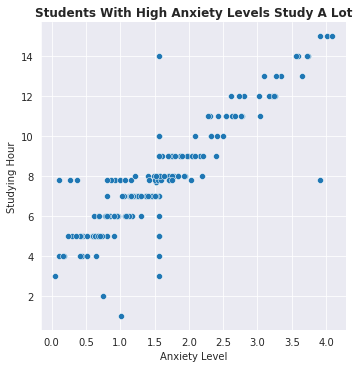

In [54]:
#Are students with high anxiety levels more likely to study more?
sns.set_style('darkgrid')
sns.relplot(x='Anxiety Level', y='Studying Hour', data=perf, kind='scatter')
plt.title('Students With High Anxiety Levels Study A Lot', fontweight = 'bold')

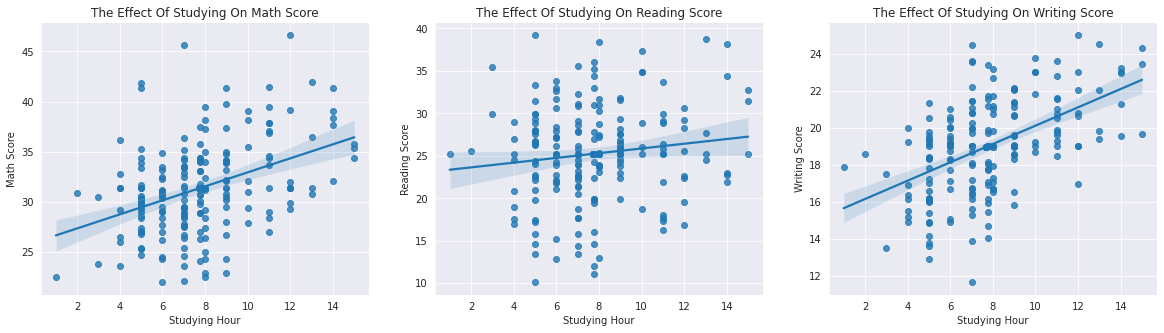

In [55]:
#Does the time students spend on studying affect their success, and if so, what is the severity of this effect for each lesson?
plt.figure(figsize=(20,5))
sns.set_style('darkgrid')

plt.subplot(1,3,1)
sns.regplot(x='Studying Hour', y='Math Score', data=perf)
plt.title('The Effect Of Studying On Math Score')

plt.subplot(1,3,2)
sns.regplot(x='Studying Hour', y='Reading Score', data=perf)
plt.title('The Effect Of Studying On Reading Score')

plt.subplot(1,3,3)
sns.regplot(x='Studying Hour', y='Writing Score', data=perf)
plt.title('The Effect Of Studying On Writing Score')
sns.despine(top=True, right=True)

Text(0.5, 1.0, 'All Three Increase Together')

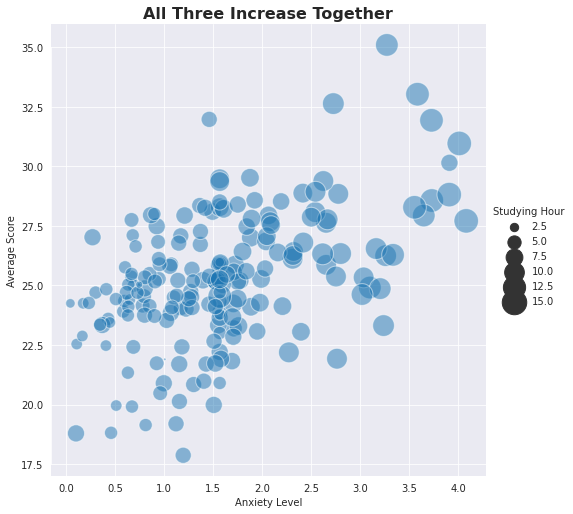

In [56]:
#Do students with high anxiety levels have trouble with their scores?
avrScore = (perf['Math Score']+perf['Reading Score']+perf['Writing Score'])/3
sns.relplot(x="Anxiety Level", y=avrScore,size="Studying Hour", 
           palette=sns.color_palette("Set1", 2),sizes=(6, 600), alpha=.5,height=7, data=perf)
plt.ylabel('Average Score')
sns.despine(trim=True)
plt.title('All Three Increase Together', fontweight='bold', fontsize=16)

Text(0.5, 0.98, "Quality Schools Increase Students' Success by Encouraging Them to Study")

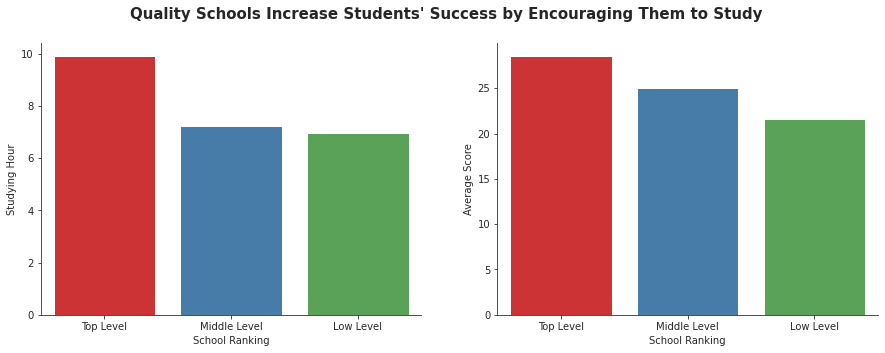

In [57]:
#Is the increase in the school quality of the schools directly related to the studying hours and average scores of the students? 
plt.figure(figsize=(15,5))
sns.set_style('ticks')


plt.subplot(1,2,1)
sns.barplot(x='School Ranking', y='Studying Hour',ci=None, data=perf, palette='Set1')
sns.despine(top=True)


plt.subplot(1,2,2)
sns.barplot(x='School Ranking', y=avrScore,ci=None, data=perf, palette='Set1')
sns.despine(top=True)
plt.ylabel('Average Score')

plt.suptitle("Quality Schools Increase Students' Success by Encouraging Them to Study", fontweight='bold', fontsize=15)

Text(0.5, 0.98, 'Success Is Not Related to Gender')

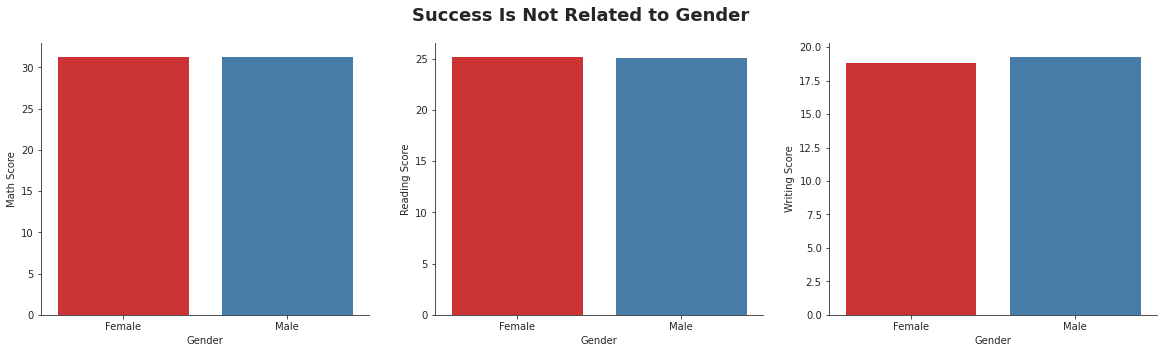

In [58]:
#Does gender have an effect on student’ success?
plt.figure(figsize=(20,5))
sns.set_style('ticks')


plt.subplot(1,3,1)
sns.barplot(y='Math Score',x='Gender',data=perf, ci=None, palette='Set1')
sns.despine(top=True)

plt.subplot(1,3,2)
sns.barplot(y='Reading Score',x='Gender',data=perf,ci=None, palette='Set1')
sns.despine(top=True)

plt.subplot(1,3,3)
sns.barplot(y='Writing Score',x='Gender',data=perf,ci=None, palette='Set1')
sns.despine(top=True)

plt.suptitle('Success Is Not Related to Gender', fontweight='bold', fontsize=18)

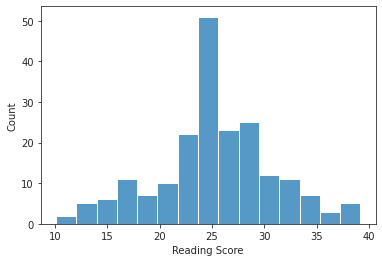

In [59]:
#To check distribution of Scores
sns.histplot(x='Reading Score', data=perf)

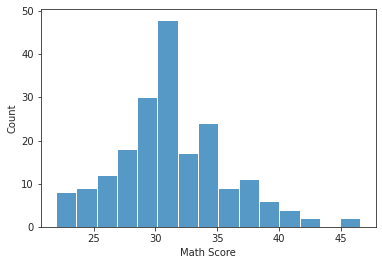

In [60]:
sns.histplot(x='Math Score', data=perf)

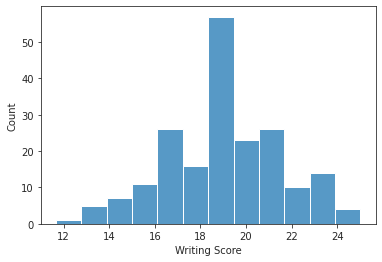

In [61]:
sns.histplot(x='Writing Score', data=perf)

Text(0.5, 1.02, 'High Performance Comes With High Quality School')

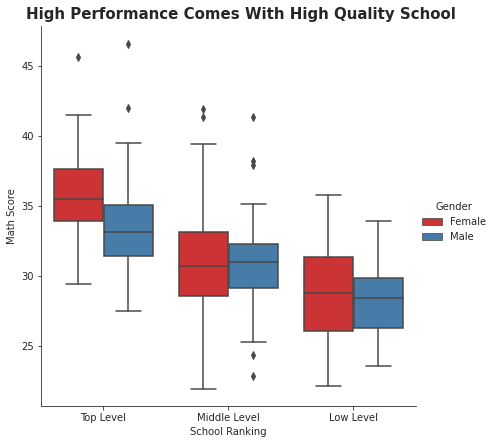

In [66]:
## Does Math Scores are affected by school ranking levels?
g = sns.catplot( y= "Math Score", x= "School Ranking", data=perf, kind="box", hue="Gender", height=6, palette='Set1')
g.fig.suptitle("High Performance Comes With High Quality School", y=1.02, fontsize = 15, fontweight = "bold")

Text(0.5, 1.02, 'Distribution of Monthly Income by Race')

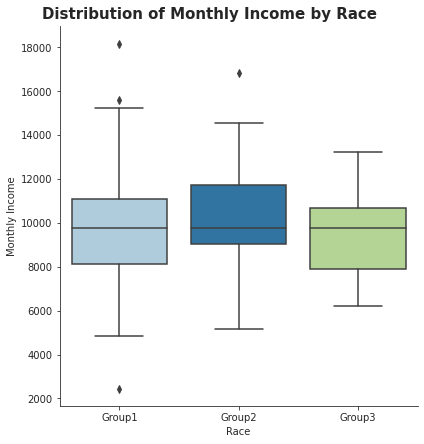

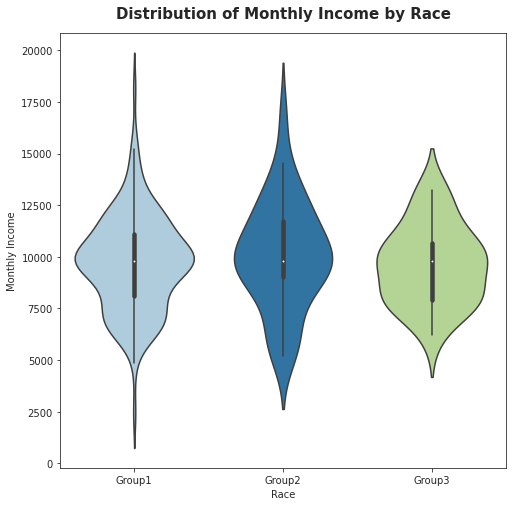

In [63]:
# How is the monthly income distributed by races?
g = sns.catplot( y= "Monthly Income", x= "Race", data=perf, kind="box", height=6, palette = 'Paired')
g.fig.suptitle("Distribution of Monthly Income by Race ", y=1.02, fontsize = 15, fontweight = "bold")
plt.figure(figsize = (8,8)) 
sns.violinplot(data=perf, x="Race", y="Monthly Income",
            palette = 'Paired')
plt.title('Distribution of Monthly Income by Race',y=1.02, fontsize = 15, fontweight = "bold")

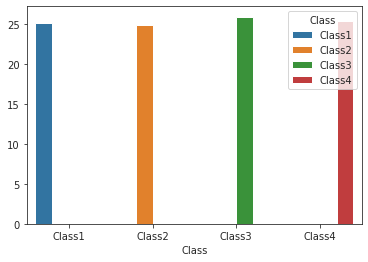

In [64]:
#Does average success vary worth considerable from class to class?
sns.barplot(x='Class', y=avrScore, data=perf, hue='Class', ci=None)